🔹 Selected sample: GSM3898728


100%|██████████| 1/1 [00:01<00:00,  1.99s/it]


Raw shape: (62548, 1)
Protein expressed shape: (19243, 1)


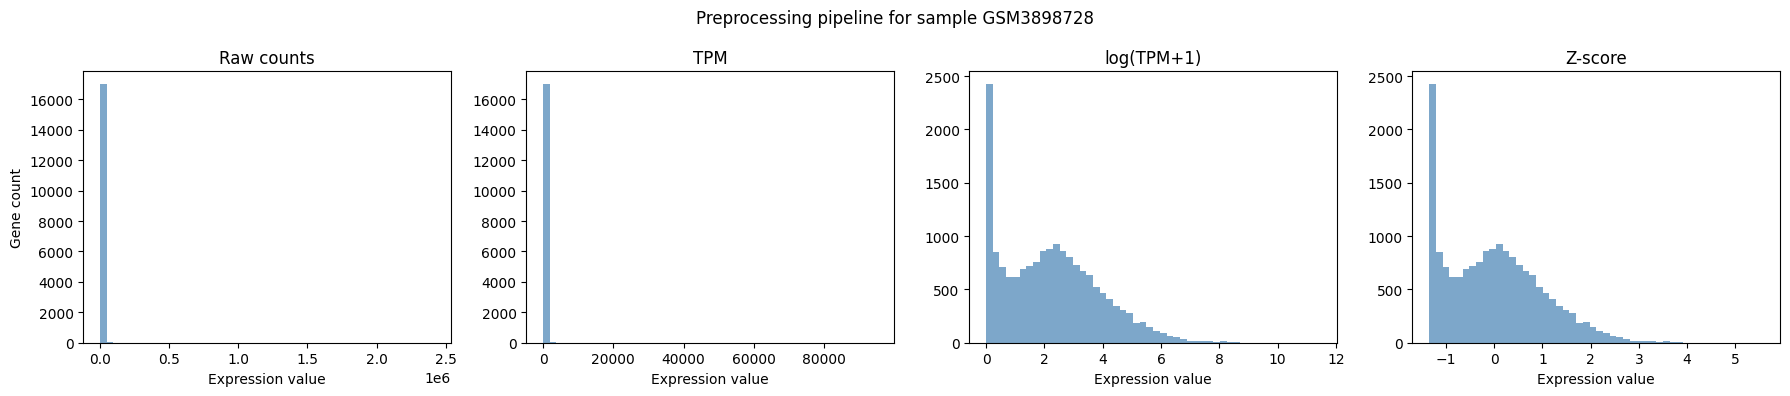


Sample gene values across stages:
ANAPC10       raw=237.0, TPM=15.2, logTPM=2.78, z=0.33
TMEM129       raw=769.0, TPM=16.5, logTPM=2.86, z=0.38
LSM14B        raw=553.0, TPM=19.4, logTPM=3.02, z=0.47
RETN          raw=5.0, TPM=0.4, logTPM=0.31, z=-1.17
TEX11         raw=24.0, TPM=0.2, logTPM=0.18, z=-1.24


In [10]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from Bio import SeqIO
import archs4py as a4

# -------------------------------------------------------------
# 1️⃣ Select one random GEO sample from your test set
# -------------------------------------------------------------
meta = pd.read_csv("./data/archs4/splits/test_metadata.csv")
geo_id = np.random.choice(meta["geo_accession"])
print(f"🔹 Selected sample: {geo_id}")

# -------------------------------------------------------------
# 2️⃣ Load its raw counts
# -------------------------------------------------------------
input_h5 = "./data/archs4/human_gene_v2.5.h5"
expr = a4.data.samples(input_h5, [geo_id])
expr = expr.groupby(expr.index).sum()
print(f"Raw shape: {expr.shape}")

# -------------------------------------------------------------
# 3️⃣ Filter to protein-coding genes
# -------------------------------------------------------------
protein_fasta = "./data/ensembl/Homo_sapiens.GRCh38.pep.all.fa"
records = []
for rec in SeqIO.parse(protein_fasta, "fasta"):
    parts = {k:v for k,v in (tok.split(":",1) for tok in rec.description.split() if ":" in tok)}
    if parts.get("gene_biotype") == "protein_coding":
        records.append({"gene_symbol": parts.get("gene_symbol"), "length": len(rec.seq)})

genes_df = pd.DataFrame(records).drop_duplicates("gene_symbol")
gene_lengths = genes_df.set_index("gene_symbol")["length"]

expr = expr.loc[expr.index.intersection(gene_lengths.index)]
print(f"Protein expressed shape: {expr.shape}")

# -------------------------------------------------------------
# 4️⃣ Apply preprocessing steps sequentially
# -------------------------------------------------------------
qc_min_nonzero = 14000

# (a) Quality control
nonzero = (expr > 0).sum(axis=1)
expr_qc = expr.loc[nonzero > 0]

# (b) TPM normalization
lengths = gene_lengths.loc[expr_qc.index].fillna(1)
rate = expr_qc.div(lengths, axis=0)
expr_tpm = rate.div(rate.sum(), axis=1) * 1e6

# (c) Log transform
expr_log = np.log1p(expr_tpm)

# (d) Standardize (z-score)
expr_std = (expr_log - expr_log.mean()) / expr_log.std()

# -------------------------------------------------------------
# 5️⃣ Visualize value distributions at each step
# -------------------------------------------------------------
fig, axes = plt.subplots(1, 4, figsize=(18,4), sharey=False)
datasets = {
    "Raw counts": expr_qc,
    "TPM": expr_tpm,
    "log(TPM+1)": expr_log,
    "Z-score": expr_std
}

for ax, (title, df) in zip(axes, datasets.items()):
    ax.hist(df.values, bins=50, color="steelblue", alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel("Expression value")
axes[0].set_ylabel("Gene count")
plt.suptitle(f"Preprocessing pipeline for sample {geo_id}")
plt.tight_layout()
plt.show()

# -------------------------------------------------------------
# 6️⃣ Optional: print a few example genes
# -------------------------------------------------------------
print("\nSample gene values across stages:")
genes = np.random.choice(expr_qc.index, 5)
for g in genes:
    print(f"{g:12s}  raw={expr_qc.loc[g, geo_id]:.1f}, "
          f"TPM={expr_tpm.loc[g, geo_id]:.1f}, "
          f"logTPM={expr_log.loc[g, geo_id]:.2f}, "
          f"z={expr_std.loc[g, geo_id]:.2f}")


✅ Loaded 19,478 protein-coding genes
🧩 12,864 test samples
🔹 Batch 1: 300 samples


100%|██████████| 300/300 [00:03<00:00, 82.83it/s] 


🔹 Batch 2: 300 samples


100%|██████████| 300/300 [00:03<00:00, 89.22it/s] 


🔹 Batch 3: 300 samples


100%|██████████| 300/300 [00:03<00:00, 87.31it/s] 


🔹 Batch 4: 300 samples


100%|██████████| 300/300 [00:03<00:00, 85.50it/s] 


🔹 Batch 5: 300 samples


100%|██████████| 300/300 [00:03<00:00, 86.83it/s] 


🔹 Batch 6: 300 samples


100%|██████████| 300/300 [00:03<00:00, 84.58it/s] 


🔹 Batch 7: 300 samples


100%|██████████| 300/300 [00:03<00:00, 86.15it/s] 


🔹 Batch 8: 300 samples


100%|██████████| 300/300 [00:03<00:00, 82.05it/s] 


🔹 Batch 9: 300 samples


100%|██████████| 300/300 [00:03<00:00, 81.87it/s] 


🔹 Batch 10: 300 samples


100%|██████████| 300/300 [00:03<00:00, 85.88it/s] 


🔹 Batch 11: 300 samples


100%|██████████| 300/300 [00:03<00:00, 84.25it/s] 


🔹 Batch 12: 300 samples


100%|██████████| 300/300 [00:03<00:00, 87.51it/s] 


🔹 Batch 13: 300 samples


100%|██████████| 300/300 [00:03<00:00, 84.09it/s] 


🔹 Batch 14: 300 samples


100%|██████████| 300/300 [00:03<00:00, 85.60it/s] 


🔹 Batch 15: 300 samples


100%|██████████| 300/300 [00:03<00:00, 85.86it/s] 


🔹 Batch 16: 300 samples


100%|██████████| 300/300 [00:03<00:00, 83.64it/s] 


🔹 Batch 17: 300 samples


100%|██████████| 300/300 [00:03<00:00, 88.39it/s] 


🔹 Batch 18: 300 samples


100%|██████████| 300/300 [00:03<00:00, 86.90it/s] 


🔹 Batch 19: 300 samples


100%|██████████| 300/300 [00:03<00:00, 87.19it/s] 


🔹 Batch 20: 300 samples


100%|██████████| 300/300 [00:03<00:00, 86.64it/s] 


🔹 Batch 21: 300 samples


100%|██████████| 300/300 [00:03<00:00, 87.49it/s] 


🔹 Batch 22: 300 samples


100%|██████████| 300/300 [00:03<00:00, 86.89it/s] 


🔹 Batch 23: 300 samples


100%|██████████| 300/300 [00:03<00:00, 87.72it/s] 


🔹 Batch 24: 300 samples


100%|██████████| 300/300 [00:03<00:00, 89.22it/s] 


🔹 Batch 25: 300 samples


100%|██████████| 300/300 [00:03<00:00, 87.60it/s] 


🔹 Batch 26: 300 samples


100%|██████████| 300/300 [00:03<00:00, 88.49it/s] 


🔹 Batch 27: 300 samples


100%|██████████| 300/300 [00:03<00:00, 86.44it/s] 


🔹 Batch 28: 300 samples


100%|██████████| 300/300 [00:03<00:00, 84.79it/s] 


🔹 Batch 29: 300 samples


100%|██████████| 300/300 [00:03<00:00, 85.13it/s] 


🔹 Batch 30: 300 samples


100%|██████████| 300/300 [00:03<00:00, 87.53it/s] 


🔹 Batch 31: 300 samples


100%|██████████| 300/300 [00:03<00:00, 86.73it/s] 


🔹 Batch 32: 300 samples


100%|██████████| 300/300 [00:03<00:00, 87.31it/s] 


🔹 Batch 33: 300 samples


100%|██████████| 300/300 [00:03<00:00, 86.48it/s] 


🔹 Batch 34: 300 samples


100%|██████████| 300/300 [00:03<00:00, 89.89it/s] 


🔹 Batch 35: 300 samples


100%|██████████| 300/300 [00:03<00:00, 86.05it/s] 


🔹 Batch 36: 300 samples


100%|██████████| 300/300 [00:03<00:00, 88.42it/s] 


🔹 Batch 37: 300 samples


100%|██████████| 300/300 [00:03<00:00, 88.11it/s] 


🔹 Batch 38: 300 samples


100%|██████████| 300/300 [00:03<00:00, 84.25it/s] 


🔹 Batch 39: 300 samples


100%|██████████| 300/300 [00:03<00:00, 83.09it/s] 


🔹 Batch 40: 300 samples


100%|██████████| 300/300 [00:03<00:00, 82.53it/s] 


🔹 Batch 41: 300 samples


100%|██████████| 300/300 [00:03<00:00, 87.59it/s] 


🔹 Batch 42: 300 samples


100%|██████████| 300/300 [00:03<00:00, 84.56it/s] 


🔹 Batch 43: 264 samples


100%|██████████| 264/264 [00:03<00:00, 76.20it/s] 


✅ Combined: 19,478 genes × 9,505 samples
⚙️ Running t-SNE...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 9505 samples in 1.536s...
[t-SNE] Computed neighbors for 9505 samples in 18.584s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9505
[t-SNE] Computed conditional probabilities for sample 2000 / 9505
[t-SNE] Computed conditional probabilities for sample 3000 / 9505
[t-SNE] Computed conditional probabilities for sample 4000 / 9505
[t-SNE] Computed conditional probabilities for sample 5000 / 9505
[t-SNE] Computed conditional probabilities for sample 6000 / 9505
[t-SNE] Computed conditional probabilities for sample 7000 / 9505
[t-SNE] Computed conditional probabilities for sample 8000 / 9505
[t-SNE] Computed conditional probabilities for sample 9000 / 9505
[t-SNE] Computed conditional probabilities for sample 9505 / 9505
[t-SNE] Mean sigma: 37.818054
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.619339
[t-SNE] KL divergence after 1

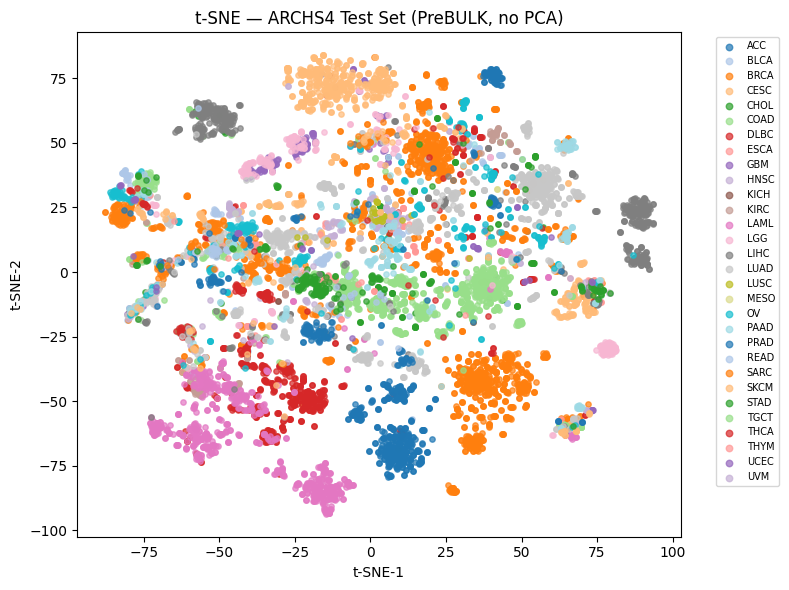

⏱️ Completed in 5.1 min


In [4]:
import os, gc, time, re
import numpy as np, pandas as pd
from Bio import SeqIO
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.manifold import TSNE
import archs4py as a4

# -------------------------------------------------------------
# CONFIGURATION
# -------------------------------------------------------------
input_h5 = "./data/archs4/human_gene_v2.5.h5"
protein_fasta = "./data/ensembl/Homo_sapiens.GRCh38.pep.all.fa"
split_csv = "./data/archs4/splits/test_metadata.csv"

batch_size = 300        # reduce if low RAM
qc_min_nonzero = 14000
start = time.time()

# -------------------------------------------------------------
# 1️⃣ Load protein-coding gene list
# -------------------------------------------------------------
records = []
for rec in SeqIO.parse(protein_fasta, "fasta"):
    parts = {k:v for k,v in (tok.split(":",1) for tok in rec.description.split() if ":" in tok)}
    if parts.get("gene_biotype") == "protein_coding":
        records.append({"gene_symbol": parts.get("gene_symbol"), "length": len(rec.seq)})
genes_df = pd.DataFrame(records).drop_duplicates("gene_symbol")
gene_lengths = genes_df.set_index("gene_symbol")["length"]
canonical_genes = genes_df["gene_symbol"].tolist()
print(f"✅ Loaded {len(genes_df):,} protein-coding genes")

# -------------------------------------------------------------
# 2️⃣ Load metadata
# -------------------------------------------------------------
meta = pd.read_csv(split_csv)
geo_ids = meta["geo_accession"].tolist()
print(f"🧩 {len(geo_ids):,} test samples")

# -------------------------------------------------------------
# 3️⃣ Stream batches → normalize → accumulate
# -------------------------------------------------------------
batches = []
for i in range(0, len(geo_ids), batch_size):
    ids = geo_ids[i:i+batch_size]
    print(f"🔹 Batch {i//batch_size+1}: {len(ids)} samples")

    expr = a4.data.samples(input_h5, ids).groupby(level=0).sum()

    # Keep all protein-coding genes (fill missing with zeros later)
    expr = expr.loc[expr.index.intersection(gene_lengths.index)]

    # QC
    nonzero = (expr > 0).sum(axis=0)
    expr = expr.loc[:, nonzero >= qc_min_nonzero]

    # TPM normalization
    lengths = gene_lengths.loc[expr.index].fillna(1)
    rate = expr.div(lengths, axis=0)
    expr_tpm = rate.div(rate.sum(axis=0), axis=1) * 1e6

    # Align to canonical full set and log-transform
    expr_log = np.log1p(expr_tpm.reindex(canonical_genes, fill_value=0))
    batches.append(expr_log.astype("float32"))

    del expr, expr_tpm, expr_log
    gc.collect()

# Combine all batches
expr_all = pd.concat(batches, axis=1)
print(f"✅ Combined: {expr_all.shape[0]:,} genes × {expr_all.shape[1]:,} samples")


# -------------------------------------------------------------
# 4️⃣ Align metadata
# -------------------------------------------------------------
meta = meta[meta["geo_accession"].isin(expr_all.columns)].reset_index(drop=True)
expr_all = expr_all.loc[:, meta["geo_accession"]]

# -------------------------------------------------------------
# 5️⃣ Standardize (no PCA)
# -------------------------------------------------------------
X = expr_all.T.astype(np.float32)
X_std = (X - X.mean()) / X.std()
X_std = X_std.fillna(0).to_numpy()

# -------------------------------------------------------------
# 6️⃣ Run t-SNE directly
# -------------------------------------------------------------
print("⚙️ Running t-SNE...")
tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    max_iter=1000,
    init="random",
    random_state=42,
    verbose=1
)
X_emb = tsne.fit_transform(X_std)

# -------------------------------------------------------------
# 7️⃣ Plot
# -------------------------------------------------------------
plt.figure(figsize=(8,6))
palette = dict(zip(sorted(meta["tcga_label"].unique()),
                   sns.color_palette("tab20", len(meta["tcga_label"].unique()))))

for label, color in palette.items():
    idx = meta["tcga_label"] == label
    plt.scatter(X_emb[idx,0], X_emb[idx,1], s=15, alpha=0.7, color=color, label=label)

plt.title("t-SNE — ARCHS4 Test Set (PreBULK, no PCA)")
plt.xlabel("t-SNE-1"); plt.ylabel("t-SNE-2")
plt.legend(markerscale=1.2, fontsize=7, bbox_to_anchor=(1.05,1))
plt.tight_layout(); plt.show()

print(f"⏱️ Completed in {(time.time()-start)/60:.1f} min")
